In [1]:
pip install spotipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import json
import re
import sys
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util


import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [5]:
#spotify_df = pd.read_csv(r"D:\Downloads\spotify 1920-2016 dataset\tracks.csv")
spotify_df = pd.read_csv(r"D:\Downloads\tracks_after_2000_filtered (1).csv")

In [6]:
spotify_df.head()
spotify_df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
151671,6i9ToXS6CAfjpp8veBklg1,Café,61,190435,0.0,['Vitão'],['06lnOkY99sXVW44Y0M4BDP'],2019-08-03,0.776,0.500,11.0,-4.788,1.0,0.0979,0.05370,0.0000,0.344,0.491,92.027,4.0
151672,6fjxgYAEaUc89LnWCmqS34,Killed by the City,60,180000,0.0,"['Bhaskar', 'Alok']","['6kT18gnkVrCz8xJQcrib7L', '0NGAZxHanS9e0iNHpR...",2019-11-10,0.686,0.763,4.0,-6.084,0.0,0.1090,0.00766,0.0105,0.397,0.366,123.961,4.0
151673,7Cpd4UGXnTrloIgZpSs46e,Passa Mal - Ao Vivo,61,154258,0.0,['Marília Mendonça'],['1yR65psqiazQpeM79CcGh8'],2019-02-22,0.688,0.910,11.0,-2.257,0.0,0.0742,0.06510,0.0000,0.674,0.877,147.767,4.0
151674,45x7IKCBRhKUc3kSFilH2q,Vai Errar de Novo - Ao Vivo,61,176103,0.0,['Pixote'],['0ciLF0bOuu2BhqzCEZgHoB'],2019-08-30,0.610,0.856,0.0,-6.193,0.0,0.0390,0.60600,0.0000,0.710,0.938,170.008,4.0
151675,159ntSAEWJ9zIMOSXmQ530,choque térmico - ao vivo,61,180001,0.0,['Luan Santana'],['3qvcCP2J0fWi0m0uQDUf6r'],2019-08-22,0.737,0.758,2.0,-5.508,1.0,0.0402,0.34200,0.0000,0.834,0.734,126.978,4.0


In [7]:
data_w_genre = pd.read_csv(r"D:\Downloads\allsong_data.csv")
data_w_genre.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",low,Neutral
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",low,Neutral
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",high,Negative
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",low,Neutral
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",low,Neutral


In [8]:
data_w_genre.dtypes

artist_name          object
id                   object
track_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
artist_pop            int64
genres               object
track_pop             int64
genres_list          object
subjectivity         object
polarity             object
dtype: object

In [9]:
data_w_genre['genres'].values[0]

'dance_pop hip_hop hip_pop pop pop_rap r&b rap urban_contemporary virginia_hip_hop'

In [10]:
data_w_genre['genres_list'].values[0][0]

'['

In [11]:
data_w_genre['genres_upd'] = data_w_genre['genres_list'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

In [12]:
data_w_genre['genres_upd'].shape

(34247,)

In [13]:
#spotify_df['artists_upd_v1'] = spotify_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))

spotify_df['artists'] = spotify_df['artists'].astype(str)
spotify_df['artists_upd_v1'] = spotify_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))


In [14]:
spotify_df['artists'].values[0]

"['Uli']"

In [15]:
spotify_df['artists_upd_v1'].values[0][0]


'Uli'

In [16]:
spotify_df[spotify_df['artists_upd_v1'].apply(lambda x: not x)].head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1
717,0krGrryTVif71gYlmkJBoI,No Milk Today,5,173573,0.0,"[""Herman's Hermits""]",['48YxSlb23RAaCd4RyHcV9V'],2020-03-13,0.660,0.529,7.0,-9.861,1.0,0.0298,0.356000,0.000000,0.0641,0.953,133.780,4.0,[]
1009,6BrupCzqckCYSNWZehvSn8,Love In The Year 3000,13,254467,0.0,"[""The B-52's""]",['3gdbcIdNypBsYNu3iiCjtN'],2008-01-01,0.684,0.880,8.0,-7.513,1.0,0.0390,0.003680,0.600000,0.0560,0.680,134.953,4.0,[]
1023,07WKpF5QcG4IDOKVR5bqH3,Love in the Year 3000 - Live,8,335333,0.0,"[""The B-52's""]",['3gdbcIdNypBsYNu3iiCjtN'],2013-01-01,0.623,0.552,8.0,-12.576,1.0,0.1080,0.041200,0.000000,0.8140,0.352,134.895,4.0,[]
1031,7kq9YG62VsQ1ixkQ0o0Gwp,Love in the Year 3000 - Live,6,255933,0.0,"[""The B-52's""]",['3gdbcIdNypBsYNu3iiCjtN'],2011-11-10,0.625,0.813,8.0,-5.875,1.0,0.0408,0.048400,0.000002,0.7390,0.498,134.919,4.0,[]
1290,7sz55iwEPOLuy5bK2cqfoZ,3000 Miles,0,179507,0.0,"[""This Year's Prophecy""]",['2zMyVWhSRGWn5sa9p1LkRc'],2015-09-20,0.484,0.868,9.0,-6.395,1.0,0.0536,0.000008,0.328000,0.0845,0.705,84.993,4.0,[]


In [17]:
spotify_df['artists_upd_v2'] = spotify_df['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
spotify_df['artists_upd'] = np.where(spotify_df['artists_upd_v1'].apply(lambda x: not x), spotify_df['artists_upd_v2'], spotify_df['artists_upd_v1'] )

In [18]:
#spotify_df['artists_song'] = spotify_df.apply(lambda row: str(row['artists_upd'][0]) if isinstance(row['artists_upd'][0], str) else '' + row['name'], axis=1)
#spotify_df['artists_song'] = spotify_df.apply(lambda row: str(row['artists_upd'][0]) + row['name'] if row['artists_upd'] and isinstance(row['artists_upd'][0], str) else row['name'], axis=1)
#spotify_df['artists_song'] = spotify_df.apply(lambda row: str(row['artists_upd'][0]) + row['name'] if isinstance(row['artists_upd'], list) and row['artists_upd'] and isinstance(row['artists_upd'][0], str) else row['name'], axis=1)
#spotify_df['artists_song'] = spotify_df.apply(lambda row: str(row['artists_upd'][0]) + row['name'] if isinstance(row['artists_upd'], list) and row['artists_upd'] and isinstance(row['artists_upd'][0], str) else row['name'], axis=1)
def concatenate_artists_song(row):
    if isinstance(row['artists_upd'], list) and row['artists_upd'] and isinstance(row['artists_upd'][0], str):
        return str(row['artists_upd'][0]) + row['name']
    else:
        return row['name']

spotify_df['artists_song'] = spotify_df.apply(concatenate_artists_song, axis=1)


In [19]:
spotify_df.sort_values(['artists_song','release_date'], ascending = False, inplace = True)

In [20]:
spotify_df[spotify_df['name']=='Adore You']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
13559,5AnCLGg35ziFOloEnXK4uu,Adore You,71,278747,0.0,['Miley Cyrus'],['5YGY8feqx7naU7z4HrwZM6'],2013-04-10,0.583,0.655,0.0,-5.407,1.0,0.0315,0.1110,0.000004,0.113,0.201,119.759,4.0,[Miley Cyrus],[],[Miley Cyrus],Miley CyrusAdore You
19108,3jjujdWJ72nww5eGnfs2E7,Adore You,88,207133,0.0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-12-13,0.676,0.771,8.0,-3.675,1.0,0.0483,0.0237,0.000007,0.102,0.569,99.048,4.0,[Harry Styles],[],[Harry Styles],Harry StylesAdore You
19748,1M4qEo4HE3PRaCOM7EXNJq,Adore You,74,207133,0.0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-06-12,0.676,0.771,8.0,-3.675,1.0,0.0483,0.0237,0.000007,0.102,0.569,99.048,4.0,[Harry Styles],[],[Harry Styles],Harry StylesAdore You


In [21]:
spotify_df['artists_upd_v1_str'] = spotify_df['artists_upd_v1'].apply(lambda x: ', '.join(x))
spotify_df.drop_duplicates(subset=['name', 'artists_upd_v1_str'], keep='first', inplace=True)


In [22]:
spotify_df[spotify_df['name']=='Adore You']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,artists_upd_v1_str
13559,5AnCLGg35ziFOloEnXK4uu,Adore You,71,278747,0.0,['Miley Cyrus'],['5YGY8feqx7naU7z4HrwZM6'],2013-04-10,0.583,0.655,0.0,-5.407,1.0,0.0315,0.1110,0.000004,0.113,0.201,119.759,4.0,[Miley Cyrus],[],[Miley Cyrus],Miley CyrusAdore You,Miley Cyrus
19108,3jjujdWJ72nww5eGnfs2E7,Adore You,88,207133,0.0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-12-13,0.676,0.771,8.0,-3.675,1.0,0.0483,0.0237,0.000007,0.102,0.569,99.048,4.0,[Harry Styles],[],[Harry Styles],Harry StylesAdore You,Harry Styles


In [23]:
artists_exploded = spotify_df[['artists_upd','id']].explode('artists_upd')

In [30]:
artists_exploded_enriched = artists_exploded.merge(data_w_genre, how = 'left', left_on = 'artists_upd',right_on = 'artist_name')
artists_exploded_enriched_nonnull = artists_exploded_enriched[~artists_exploded_enriched.genres_upd.isnull()]

In [31]:
artists_exploded_enriched_nonnull[artists_exploded_enriched_nonnull['id_x'] =='3jjujdWJ72nww5eGnfs2E7']

,artists_upd,id_x,artist_name,id_y,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,genres_upd
378407,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,5Ohxk2dO5COHF1krpoPigN,Sign of the Times,0.516,0.595,5.0,-4.630,1.0,0.0313,0.027500,0.000000,0.1090,0.222,119.972,87.0,pop,84.0,['pop'],low,Neutral,[pop]
378408,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,0.427,0.262,7.0,-8.541,1.0,0.0276,0.746000,0.000000,0.0680,0.228,104.085,87.0,pop,79.0,['pop'],high,Positive,[pop]
378409,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,4u9Y4Z9i9VaAbBK7rW1Rha,Meet Me in the Hallway,0.537,0.383,2.0,-6.528,1.0,0.0247,0.747000,0.000250,0.3560,0.339,104.252,87.0,pop,72.0,['pop'],low,Neutral,[pop]
378410,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,3Dwq1oiOFys6Sxr5SslmXw,Carolina,0.624,0.673,4.0,-4.017,0.0,0.0268,0.000569,0.000002,0.1040,0.458,121.986,87.0,pop,72.0,['pop'],low,Neutral,[pop]
378411,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,4B1rpPmQXwj78wk6aIGwwU,Two Ghosts,0.386,0.407,6.0,-7.095,0.0,0.0268,0.234000,0.000002,0.0999,0.456,69.387,87.0,pop,76.0,['pop'],low,Neutral,[pop]
378412,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,5Lbsc65org0b85kNsPkluY,Only Angel,0.554,0.842,5.0,-4.113,1.0,0.0397,0.287000,0.000000,0.1060,0.348,114.036,87.0,pop,72.0,['pop'],high,Neutral,[pop]
378413,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,33SNO8AaciGbNaQFkxvPrW,Kiwi,0.375,0.930,2.0,-2.631,1.0,0.0561,0.000640,0.000000,0.3180,0.491,147.124,87.0,pop,80.0,['pop'],low,Neutral,[pop]
378414,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,5LABCxgmP7DATATIJXOh6n,Ever Since New York,0.389,0.537,10.0,-6.761,1.0,0.0309,0.200000,0.000003,0.1250,0.383,127.964,87.0,pop,70.0,['pop'],high,Positive,[pop]
378415,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,33bURv895AN4FkBvgFo2dx,Woman,0.624,0.647,3.0,-4.680,0.0,0.0335,0.016900,0.003800,0.2210,0.379,136.022,87.0,pop,75.0,['pop'],low,Neutral,[pop]
378416,Harry Styles,3jjujdWJ72nww5eGnfs2E7,Harry Styles,1IF5UcqRO42D12vYwceOY6,From the Dining Table,0.671,0.156,8.0,-16.288,1.0,0.0371,0.804000,0.051800,0.1130,0.201,94.080,87.0,pop,77.0,['pop'],low,Neutral,[pop]


In [32]:
print(artists_exploded_enriched_nonnull.columns)


Index(['artists_upd', 'id_x', 'artist_name', 'id_y', 'track_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'artist_pop', 'genres', 'track_pop', 'genres_list', 'subjectivity',
       'polarity', 'genres_upd'],
      dtype='object')


In [33]:
artists_genres_consolidated = artists_exploded_enriched_nonnull.groupby('id_x')['genres_upd'].apply(list).reset_index()

In [34]:
# Filter out rows with missing genre information
data_w_genre_filtered = data_w_genre.dropna(subset=['genres_upd'])

# Explode the 'genres_upd' column to flatten the list of genres
exploded_genres = data_w_genre_filtered['genres_upd'].explode()

# Find unique genres
unique_genres = exploded_genres.unique()

# Print unique genres
print("Unique genres in data_w_genre DataFrame:")
print(unique_genres)


Unique genres in data_w_genre DataFrame:
['dance_pop' 'hip_hop' 'hip_pop' ... 'uk_garage' 'weightless'
 'jazz_guitar_trio']


In [35]:
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))

In [36]:
artists_genres_consolidated.head()

,id_x,genres_upd,consolidates_genre_lists
0,000xYdQfIZ4pDmBGzQalKU,"[[sertanejo, sertanejo_pop, sertanejo_universi...","[sertanejo_universitario, sertanejo_pop, serta..."
1,00105Q1NbnHkf8R5eXXeXm,"[[latin, reggaeton, trap_latino], [latin, regg...","[latin, reggaeton, trap_latino]"
2,001UkMQHw4zXfFNdKpwXAF,"[[contemporary_country, country, country_road,...","[country_rock, country_road, country, contempo..."
3,003fzMu2jBvZqXNPMYNYox,"[[champeta, colombian_pop, latin, latin_pop, t...","[tropical, champeta, latin_pop, colombian_pop,..."
4,004q4eDxR33ci4f8m4flwl,"[[bachata, dominican_pop, latin, latin_alterna...","[dominican_pop, latin_pop, latin, bachata, lat..."


In [37]:
spotify_df = spotify_df.merge(artists_genres_consolidated[['id_x', 'consolidates_genre_lists']], left_on='id', right_on='id_x', how='left')


In [38]:
print(spotify_df.columns)


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'artists_upd_v1',
       'artists_upd_v2', 'artists_upd', 'artists_song', 'artists_upd_v1_str',
       'id_x', 'consolidates_genre_lists'],
      dtype='object')


In [40]:
spotify_df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,artists_upd_v1_str,id_x,consolidates_genre_lists
138997,7sTqYRm5KAtgAbiw2qoZoT,Suelten 2,34,237773,1.0,"[""At' Fat"", 'Dubosky', 'Yemil']","['455JBMYIT1lWf1Djj4rDc7', '6tMb6Fah1HWzlaHE9y...",2018-11-07,0.907,0.819,3.0,-3.052,0.0,0.1840,0.6620,0.00114,0.700,0.894,108.077,4.0,"[ Fat"", , , ]",[At' Fat],"[ Fat"", , , ]","Fat"", Suelten 2","Fat"", , ,",NaN,NaN
138998,366RO7Xyf09HvGmawv0RYc,Cumplemes,34,189000,1.0,"[""At' Fat"", 'El Zeta', 'Dubosky', 'Italian Som...","['455JBMYIT1lWf1Djj4rDc7', '24iSgjiesQ2bhUsHsa...",2020-01-30,0.579,0.804,5.0,-4.007,0.0,0.2720,0.0407,0.00000,0.328,0.820,93.482,4.0,"[ Fat"", , , , , ]",[At' Fat],"[ Fat"", , , , , ]","Fat"", Cumplemes","Fat"", , , , ,",NaN,NaN
138999,3YCC4oCzagcfx4s3fp3XFz,Bandolera,35,322926,1.0,"[""At' Fat"", 'Yemil', 'Boza', 'El Tachi']","['455JBMYIT1lWf1Djj4rDc7', '7g4cPtKxNx146qdaY9...",2020-11-17,0.502,0.814,5.0,-2.688,0.0,0.1330,0.5240,0.00000,0.151,0.672,72.344,4.0,"[ Fat"", , , , , ]",[At' Fat],"[ Fat"", , , , , ]","Fat"", Bandolera","Fat"", , , , ,",NaN,NaN
139000,7f092ECp06XbFS6Ms5Yk6R,Mia Oraia Petalouda,26,100313,0.0,"[""Typaldos' Children's Choire""]",['7JJrBciIAQBPOBB5U6u49p'],2014-08-06,0.773,0.183,0.0,-9.370,1.0,0.0370,0.9560,0.00000,0.119,0.864,79.950,4.0,[ Children],[Typaldos' Children's Choire],[ Children],ChildrenMia Oraia Petalouda,Children,NaN,NaN
139001,1yw3fl6UGrxjq3BTeJh6xz,I Koukouvagia,28,96508,0.0,"[""Typaldos' Children's Choire""]",['7JJrBciIAQBPOBB5U6u49p'],2014-08-06,0.748,0.256,9.0,-10.177,1.0,0.0532,0.9690,0.00000,0.120,0.924,179.898,4.0,[ Children],[Typaldos' Children's Choire],[ Children],ChildrenI Koukouvagia,Children,NaN,NaN


In [42]:
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,artists_upd_v1_str,id_x,consolidates_genre_lists
0,1Mv4u308L16NZDZiD6HZCy,사랑은 힘든가봐,28,213440,0.0,['지수'],['4c9QIMfEbIIynuaswyxGx9'],2005-12-23,0.675,0.785,4.0,-5.026,0.0,0.0280,0.379,0.000000,0.353,0.623,103.008,4.0,[지수],[],[지수],지수사랑은 힘든가봐,지수,NaN,NaN
1,1jvoY322nxyKXq8OBhgmSY,어떡하죠,44,244360,0.0,['지선'],['2Mo9NQaNCFCWSR5CnlfmbN'],2011-10-13,0.606,0.341,0.0,-7.094,1.0,0.0513,0.779,0.000000,0.144,0.294,135.667,4.0,[지선],[],[지선],지선어떡하죠,지선,NaN,NaN
2,7rxpWwcXNgDUXl0wN0gUvp,천국의 기억 장정우 Version,31,280372,0.0,['장정우'],['5L7zKs2ftwENWOMI7LFaN1'],2003-12-24,0.494,0.656,7.0,-6.347,0.0,0.0262,0.659,0.000007,0.111,0.420,82.003,4.0,[장정우],[],[장정우],장정우천국의 기억 장정우 Version,장정우,NaN,NaN
3,0cEvzbXjxkOxgBUmBUcHZW,그것만은..,32,294452,0.0,['장정우'],['5L7zKs2ftwENWOMI7LFaN1'],2003-12-24,0.311,0.487,4.0,-6.847,0.0,0.0265,0.484,0.000000,0.241,0.159,59.464,4.0,[장정우],[],[장정우],장정우그것만은..,장정우,NaN,NaN
4,2xnE8SFDOs20FTAaVl98nr,처음 그 자리에,40,233213,0.0,['이보람'],['151APvoui0QiXyOakfPGt5'],2007-09-11,0.524,0.602,4.0,-5.728,1.0,0.0459,0.690,0.000000,0.106,0.155,139.788,4.0,[이보람],[],[이보람],이보람처음 그 자리에,이보람,NaN,NaN


In [43]:
spotify_df['year'] = spotify_df['release_date'].apply(lambda x: x.split('-')[0])

In [44]:
float_cols = spotify_df.dtypes[spotify_df.dtypes == 'float64'].index.values


In [45]:
ohe_cols = 'popularity'

In [46]:
spotify_df['popularity'].describe()

count    139002.000000
mean         37.657149
std          19.467464
min           0.000000
25%          26.000000
50%          40.000000
75%          52.000000
max          99.000000
Name: popularity, dtype: float64

In [47]:
# create 5 point buckets for popularity 
spotify_df['popularity_red'] = spotify_df['popularity'].apply(lambda x: int(x/5))

In [48]:
# tfidf can't handle nulls so fill any null values with an empty list
spotify_df['consolidates_genre_lists'] = spotify_df['consolidates_genre_lists'].apply(lambda d: d if isinstance(d, list) else [])

In [49]:
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,artists_upd_v1_str,id_x,consolidates_genre_lists,year,popularity_red
0,1Mv4u308L16NZDZiD6HZCy,사랑은 힘든가봐,28,213440,0.0,['지수'],['4c9QIMfEbIIynuaswyxGx9'],2005-12-23,0.675,0.785,4.0,-5.026,0.0,0.0280,0.379,0.000000,0.353,0.623,103.008,4.0,[지수],[],[지수],지수사랑은 힘든가봐,지수,NaN,[],2005,5
1,1jvoY322nxyKXq8OBhgmSY,어떡하죠,44,244360,0.0,['지선'],['2Mo9NQaNCFCWSR5CnlfmbN'],2011-10-13,0.606,0.341,0.0,-7.094,1.0,0.0513,0.779,0.000000,0.144,0.294,135.667,4.0,[지선],[],[지선],지선어떡하죠,지선,NaN,[],2011,8
2,7rxpWwcXNgDUXl0wN0gUvp,천국의 기억 장정우 Version,31,280372,0.0,['장정우'],['5L7zKs2ftwENWOMI7LFaN1'],2003-12-24,0.494,0.656,7.0,-6.347,0.0,0.0262,0.659,0.000007,0.111,0.420,82.003,4.0,[장정우],[],[장정우],장정우천국의 기억 장정우 Version,장정우,NaN,[],2003,6
3,0cEvzbXjxkOxgBUmBUcHZW,그것만은..,32,294452,0.0,['장정우'],['5L7zKs2ftwENWOMI7LFaN1'],2003-12-24,0.311,0.487,4.0,-6.847,0.0,0.0265,0.484,0.000000,0.241,0.159,59.464,4.0,[장정우],[],[장정우],장정우그것만은..,장정우,NaN,[],2003,6
4,2xnE8SFDOs20FTAaVl98nr,처음 그 자리에,40,233213,0.0,['이보람'],['151APvoui0QiXyOakfPGt5'],2007-09-11,0.524,0.602,4.0,-5.728,1.0,0.0459,0.690,0.000000,0.106,0.155,139.788,4.0,[이보람],[],[이보람],이보람처음 그 자리에,이보람,NaN,[],2007,8


In [50]:
#simple function to create OHE features
#this gets passed later on
def ohe_prep(df, column, new_name): 
    """ 
    Create One Hot Encoded features of a specific column

    Parameters: 
        df (pandas dataframe): Spotify Dataframe
        column (str): Column to be processed
        new_name (str): new column name to be used
        
    Returns: 
        tf_df: One hot encoded features 
    """
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [51]:
def create_feature_set(df, float_cols):
    """ 
    Process spotify df to create a final set of features that will be used to generate recommendations

    Parameters: 
        df (pandas dataframe): Spotify Dataframe
        float_cols (list(str)): List of float columns that will be scaled 
        
    Returns: 
        final: final set of features 
    """
    
    # TF-IDF vectorization for genre lists
    if not df['consolidates_genre_lists'].empty:
        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform(df['consolidates_genre_lists'].apply(lambda x: " ".join(x)))
        genre_df = pd.DataFrame(tfidf_matrix.toarray())
       # genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
        genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
        genre_df.reset_index(drop=True, inplace=True)
    else:
        # If genre lists are empty, create an empty dataframe
        genre_df = pd.DataFrame()

    # One-hot encoding for year and popularity
    year_ohe = ohe_prep(df, 'year', 'year') * 0.5
    popularity_ohe = ohe_prep(df, 'popularity_red', 'pop') * 0.15

    # Scale float columns
    floats = df[float_cols].reset_index(drop=True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns=floats.columns) * 0.2

    # Concatenate all features
    final = pd.concat([genre_df, floats_scaled, popularity_ohe, year_ohe], axis=1)
     
    # Add song id
    final['id'] = df['id'].values
    
    return final


In [52]:
complete_feature_set = create_feature_set(spotify_df, float_cols=float_cols)

In [53]:
complete_feature_set.to_csv('complete_feature_set_1.csv', index=False)



KeyboardInterrupt



In [54]:
complete_feature_set.head()

genre|_hip_hop  genre|a_cappella  genre|abstract_hip_hop  genre|acid_jazz  \
0             0.0               0.0                     0.0              0.0   
1             0.0               0.0                     0.0              0.0   
2             0.0               0.0                     0.0              0.0   
3             0.0               0.0                     0.0              0.0   
4             0.0               0.0                     0.0              0.0   

   genre|acid_rock  genre|acoustic_blues  genre|acoustic_cover  \
0              0.0                   0.0                   0.0   
1              0.0                   0.0                   0.0   
2              0.0                   0.0                   0.0   
3              0.0                   0.0                   0.0   
4              0.0                   0.0                   0.0   

   genre|acoustic_pop  genre|acoustic_rock  genre|adoracion  \
0                 0.0                  0.0              0.0   
1                 0.0                  0.0              0.0   
2                 0.0                  0.0              0.0   
3                 0.0                  0.0              0.0   
4                 0.0                  0.0              0.0   

   genre|adoracion_pentecostal  genre|adult_standards  genre|adventista  \
0                          0.0                    0.0               0.0   
1                          0.0                    0.0               0.0   
2                          0.0                    0.0               0.0   
3                          0.0                    0.0               0.0   
4                          0.0                    0.0               0.0   

   genre|aesthetic_rap  genre|african  genre|african_gospel  \
0                  0.0            0.0                   0.0   
1                  0.0            0.0                   0.0   
2                  0.0            0.0                   0.0   
3                  0.0            0.0                   0.0   
4                  0.0            0.0                   0.0   

   genre|african_percussion  genre|african_reggae  genre|african_rock  \
0                       0.0                   0.0                 0.0   
1                       0.0                   0.0                 0.0   
2                       0.0                   0.0                 0.0   
3                       0.0                   0.0                 0.0   
4                       0.0                   0.0                 0.0   

   genre|afro_dancehall  genre|afro_house  genre|afro_soul  genre|afrobeat  \
0                   0.0               0.0              0.0             0.0   
1                   0.0               0.0              0.0             0.0   
2                   0.0               0.0              0.0             0.0   
3                   0.0               0.0              0.0             0.0   
4                   0.0               0.0              0.0             0.0   

   genre|afrofuturism  genre|afrofuturismo_brasileiro  genre|afropop  \
0                 0.0                             0.0            0.0   
1                 0.0                             0.0            0.0   
2                 0.0                             0.0            0.0   
3                 0.0                             0.0            0.0   
4                 0.0                             0.0            0.0   

   genre|afroswing  genre|ahead_jazz  genre|ai  genre|alabama_indie  \
0              0.0               0.0       0.0                  0.0   
1              0.0               0.0       0.0                  0.0   
2              0.0               0.0       0.0                  0.0   
3              0.0               0.0       0.0                  0.0   
4              0.0               0.0       0.0                  0.0   

   genre|alabama_metal  genre|alabama_rap  genre|albanian_hip_hop  \
0                  0.0                0.0                     0.0   
1         

In [90]:
complete_feature_set = pd.read_csv(r"D:\Downloads\complete_feature_set_1.csv")

 #3. Connect to Spotify API

In [55]:
#client id and secret for my application
client_id = 'CLIENT_ID'
client_secret= 'CLIENT_SECRET'

In [56]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

In [57]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [58]:
token = util.prompt_for_user_token(scope, client_id= client_id, client_secret=client_secret, redirect_uri='http://localhost:8881/')

In [60]:
sp = spotipy.Spotify(auth=token)

In [ ]:
#gather playlist names and images. 
#images aren't going to be used until I start building a UI
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:

    id_name[i['name']] = i['uri'].split(':')[2]
    list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']

In [62]:
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:
    id_name[i['name']] = i['uri'].split(':')[2]
    if i['images']:
        list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']
    else:
        # Handle the case when there are no images
        list_photo[i['uri'].split(':')[2]] = None  # or any default value you prefer


In [63]:
id_name

{'Indie Mix': '37i9dQZF1EQqkOPvHGajmW',
 'My recommendation playlist': '6I1T19hyZqAOTHHuh9JWLK',
 'BADDIE GETTING READY💋': '0hnISe1FaRpHECwLMj1TLT',
 'daylist • scream baking monday late night': '37i9dQZF1EP6YuccBxUcC1',
 'Hot Pink': '37i9dQZF1DX45grRWk2ghU',
 'Sluttiest songs I could ever find': '0RDn6NrSFkhVPVCKPL56oy',
 'Cry btch': '6d1YGZNUJyvzJRW88Yj9ni',
 'Kali Uchis Radio': '37i9dQZF1E4DH1AElkX6WW',
 'u needa cry dont ya': '6rsZsARsZreCFHHaJojQQN',
 'Exidtzzz': '6AIr7o0Sa5FlmdOXBq1Auh',
 'female rage❤️\u200d🔥': '7kVMYY3DNNvsWElpJQdHbU',
 'Your Top Songs 2023': '37i9dQZF1Fa1IIVtEpGUcU',
 'angry woman': '5uJ1lxcRqfa33VaeWnonWT',
 'Hip Hop Mix': '37i9dQZF1EQnqst5TRi17F',
 'Girlboss energy': '4TOFmIv137LePbjiJylaLZ',
 'Happiness is a butterfly Radio': '37i9dQZF1E8M810dygFJMX',
 'Spotalike: Arctic Monkeys - I Wanna Be Yours': '1u70QZe7lFWVpnvYddictq',
 'Spotalike: Beyoncé - XO': '3MgciRr6vrj8B4haauCl9z',
 'Make Out Jams': '37i9dQZF1DXbEm2sKzgoJ8',
 'Miss Americana & The Heartbreak Pr

In [64]:
def create_necessary_outputs(playlist_name,id_dic, df):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        playlist_name (str): name of the playlist you'd like to pull from the spotify API
        id_dic (dic): dictionary that maps playlist_name to playlist_id
        df (pandas dataframe): spotify datafram
        
    Returns: 
        playlist: all songs in the playlist THAT ARE AVAILABLE IN THE KAGGLE DATASET
    """
    
    #generate playlist dataframe
    playlist = pd.DataFrame()
    playlist_name = playlist_name

    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        #print(i['track']['artists'][0]['name'])
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['id'].isin(df['id'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [65]:
id_name

{'Indie Mix': '37i9dQZF1EQqkOPvHGajmW',
 'My recommendation playlist': '6I1T19hyZqAOTHHuh9JWLK',
 'BADDIE GETTING READY💋': '0hnISe1FaRpHECwLMj1TLT',
 'daylist • scream baking monday late night': '37i9dQZF1EP6YuccBxUcC1',
 'Hot Pink': '37i9dQZF1DX45grRWk2ghU',
 'Sluttiest songs I could ever find': '0RDn6NrSFkhVPVCKPL56oy',
 'Cry btch': '6d1YGZNUJyvzJRW88Yj9ni',
 'Kali Uchis Radio': '37i9dQZF1E4DH1AElkX6WW',
 'u needa cry dont ya': '6rsZsARsZreCFHHaJojQQN',
 'Exidtzzz': '6AIr7o0Sa5FlmdOXBq1Auh',
 'female rage❤️\u200d🔥': '7kVMYY3DNNvsWElpJQdHbU',
 'Your Top Songs 2023': '37i9dQZF1Fa1IIVtEpGUcU',
 'angry woman': '5uJ1lxcRqfa33VaeWnonWT',
 'Hip Hop Mix': '37i9dQZF1EQnqst5TRi17F',
 'Girlboss energy': '4TOFmIv137LePbjiJylaLZ',
 'Happiness is a butterfly Radio': '37i9dQZF1E8M810dygFJMX',
 'Spotalike: Arctic Monkeys - I Wanna Be Yours': '1u70QZe7lFWVpnvYddictq',
 'Spotalike: Beyoncé - XO': '3MgciRr6vrj8B4haauCl9z',
 'Make Out Jams': '37i9dQZF1DXbEm2sKzgoJ8',
 'Miss Americana & The Heartbreak Pr

In [66]:
#playlist_Cryyy = create_necessary_outputs('Cryyy', id_name,spotify_df)
#playlist_Cryyy.to_csv('playlist_Cryyy.csv', index=False)
playlist_DsW = create_necessary_outputs('Discover Weekly', id_name,spotify_df)
playlist_DsW.to_csv('playlist_DsW.csv', index=False)
#playlist_Cry = create_necessary_outputs('Cry btch',id_name, spotify_df)
#playlist_classical = create_necessary_outputs('Epic Classical',id_name, spotify_df)

In [162]:
playlist_DsW

,artist,name,id,url,date_added
0,G-Eazy,Lady Killers (feat. Hoodie Allen),4HnPZXkx15Y5hfBWh9vtQL,https://i.scdn.co/image/ab67616d00001e027181af...,2024-04-21 18:30:00+00:00
3,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,https://i.scdn.co/image/ab67616d00001e02203c89...,2024-04-21 18:30:00+00:00
7,Nicki Minaj,Va Va Voom,2jATUzETZL49e6SywauZKE,https://i.scdn.co/image/ab67616d00001e024f0aae...,2024-04-21 18:30:00+00:00
9,Justin Timberlake,Rock Your Body,1AWQoqb9bSvzTjaLralEkT,https://i.scdn.co/image/ab67616d00001e02346a57...,2024-04-21 18:30:00+00:00
10,Muse,Supermassive Black Hole,3lPr8ghNDBLc2uZovNyLs9,https://i.scdn.co/image/ab67616d00001e0228933b...,2024-04-21 18:30:00+00:00
11,JAWNY,Honeypie,6FfLg6FFqhCsrFOaHIGkg0,https://i.scdn.co/image/ab67616d00001e02bf076b...,2024-04-21 18:30:00+00:00
14,Kanye West,Bound 2,3sNVsP50132BTNlImLx70i,https://i.scdn.co/image/ab67616d00001e021dacfb...,2024-04-21 18:30:00+00:00
15,Lee Hyori,10 Minutes,2Tfv41qZ0U3ahZiKiDBa4a,https://i.scdn.co/image/ab67616d00001e02a19404...,2024-04-21 18:30:00+00:00
17,Rihanna,Sex With Me,7BiELrM90hRxpozaIXbsLw,https://i.scdn.co/image/ab67616d00001e0233c6b9...,2024-04-21 18:30:00+00:00
20,Steven Universe,Love Like You (feat. Rebecca Sugar) - End Credits,3z9OnsnvM6SFN2dzrSDdVO,https://i.scdn.co/image/ab67616d00001e02e18ff2...,2024-04-21 18:30:00+00:00


In [ ]:
visualize_songs(playlist_Cryyy)
visualize_songs(playlist_Cry)
visualize_songs(playlist_DsW)


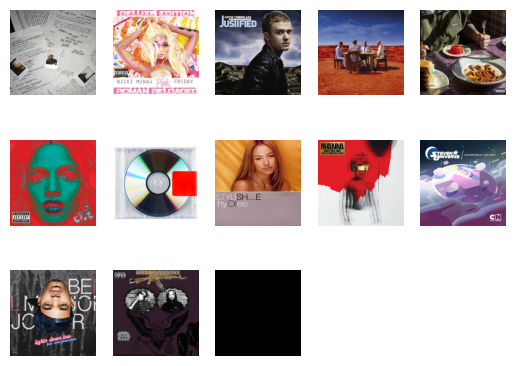

NameError: name 'playlist_Cryyy' is not defined

In [67]:
import matplotlib.pyplot as plt
import skimage.io as io

def visualize_songs(playlist_df):
    temp = playlist_df['url']
    columns = 5
    
    # Calculate the number of rows using integer division
    rows = len(temp) // columns + 1
    
    # Create subplots for each song
    for i, url in enumerate(temp):
        plt.subplot(rows, columns, i + 1)
        image = io.imread(url)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()

# Assuming playlist_Cryyy and playlist_Cry are DataFrames returned by create_necessary_outputs
visualize_songs(playlist_DsW)
visualize_songs(playlist_Cryyy)
visualize_songs(playlist_Cry)


In [68]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):
    """ 
    Visualize cover art of the songs in the inputted dataframe

    Parameters: 
        df (pandas dataframe): Playlist Dataframe
    """
    
    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

In [69]:
#playlist_Cryyy
playlist_DsW

,artist,name,id,url,date_added
3,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,https://i.scdn.co/image/ab67616d00001e02203c89...,2024-04-21 18:30:00+00:00
7,Nicki Minaj,Va Va Voom,2jATUzETZL49e6SywauZKE,https://i.scdn.co/image/ab67616d00001e024f0aae...,2024-04-21 18:30:00+00:00
9,Justin Timberlake,Rock Your Body,1AWQoqb9bSvzTjaLralEkT,https://i.scdn.co/image/ab67616d00001e02346a57...,2024-04-21 18:30:00+00:00
10,Muse,Supermassive Black Hole,3lPr8ghNDBLc2uZovNyLs9,https://i.scdn.co/image/ab67616d00001e0228933b...,2024-04-21 18:30:00+00:00
11,JAWNY,Honeypie,6FfLg6FFqhCsrFOaHIGkg0,https://i.scdn.co/image/ab67616d00001e02bf076b...,2024-04-21 18:30:00+00:00
13,M.I.A.,Bad Girls,6nzXkCBOhb2mxctNihOqbb,https://i.scdn.co/image/ab67616d00001e023d6fa2...,2024-04-21 18:30:00+00:00
14,Kanye West,Bound 2,3sNVsP50132BTNlImLx70i,https://i.scdn.co/image/ab67616d00001e021dacfb...,2024-04-21 18:30:00+00:00
15,Lee Hyori,10 Minutes,2Tfv41qZ0U3ahZiKiDBa4a,https://i.scdn.co/image/ab67616d00001e02a19404...,2024-04-21 18:30:00+00:00
17,Rihanna,Sex With Me,7BiELrM90hRxpozaIXbsLw,https://i.scdn.co/image/ab67616d00001e0233c6b9...,2024-04-21 18:30:00+00:00
20,Steven Universe,Love Like You (feat. Rebecca Sugar) - End Credits,3z9OnsnvM6SFN2dzrSDdVO,https://i.scdn.co/image/ab67616d00001e02e18ff2...,2024-04-21 18:30:00+00:00


CREATE PLAYLIST VECTOR

In [ ]:
complete_feature_set = pd.read_csv(r"D:\Downloads\complete_feature_set_1.csv")
print("Complete Feature Set:")
complete_feature_set.head()
    
print("Playlist DataFrame:")
print(playlist_Cryyy)
    
complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_Cryyy['id'].values)]
    


In [70]:
def generate_playlist_feature(complete_feature_set, playlist_df, weight_factor):
    """ 
    Summarize a user's playlist into a single vector

    Parameters: 
        complete_feature_set (pandas dataframe): Dataframe which includes all of the features for the spotify songs
        playlist_df (pandas dataframe): playlist dataframe
        weight_factor (float): float value that represents the recency bias. The larger the recency bias, the most priority recent songs get. Value should be close to 1. 
        
    Returns: 
        playlist_feature_set_weighted_final (pandas series): single feature that summarizes the playlist
        complete_feature_set_nonplaylist (pandas dataframe): 
    """
  
    
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1).mean(axis =0)
    complete_feature_set_playlist = complete_feature_set_playlist.merge(playlist_df[['id','date_added']], on = 'id', how = 'inner')
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1)
    
    playlist_feature_set = complete_feature_set_playlist.sort_values('date_added',ascending=False)

    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days / 30)
        
    playlist_feature_set['weight'] = playlist_feature_set['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    #print(playlist_feature_set_weighted.iloc[:,:-4].columns)
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-4].mul(playlist_feature_set_weighted.weight,0))
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-4]
    #playlist_feature_set_weighted_final['id'] = playlist_feature_set['id']
    
    return playlist_feature_set_weighted_final.sum(axis = 0), complete_feature_set_nonplaylist

In [71]:
#complete_feature_set_playlist_vector_Cry, complete_feature_set_nonplaylist_Cry = generate_playlist_feature(complete_feature_set, playlist_Cry, 1.09)
complete_feature_set_playlist_vector_DsW, complete_feature_set_nonplaylist_DsW = generate_playlist_feature(complete_feature_set, playlist_DsW, 1.09)

In [73]:
complete_feature_set_playlist_vector_DsW.shape

(1625,)

GENERTAE RECOMMENDATIONS 

In [74]:
def generate_playlist_recos(df, features, nonplaylist_features):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        df (pandas dataframe): spotify dataframe
        features (pandas series): summarized playlist feature
        nonplaylist_features (pandas dataframe): feature set of songs that are not in the selected playlist
        
    Returns: 
        non_playlist_df_top_40: Top 40 recommendations for that playlist
    """
    
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)
    non_playlist_df_top_40['url'] = non_playlist_df_top_40['id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return non_playlist_df_top_40

In [75]:
DsW_top40 = generate_playlist_recos(spotify_df, complete_feature_set_playlist_vector_DsW, complete_feature_set_nonplaylist_DsW)

In [76]:
DsW_top40

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,artists_upd_v1_str,id_x,consolidates_genre_lists,year,popularity_red,sim,url
73643,0uDdI4fAXCuNhQbmxENdsO,Can I,71,167810,1.0,['Kehlani'],['0cGUm45nv7Z6M6qdXYQGTX'],2020-08-05,0.574,0.791,1.0,-3.752,1.0,0.1100,0.419000,0.000000,0.0982,0.612,119.537,4.0,[Kehlani],[],[Kehlani],KehlaniCan I,Kehlani,0uDdI4fAXCuNhQbmxENdsO,"[pop_rap, pop, r&b, dance_pop]",2020,14,0.652086,https://i.scdn.co/image/ab67616d00001e023ba8dc...
115829,0gFkruQrXlxIOo738m76Xb,Strip (feat. Kevin McCall),59,167813,1.0,"['Chris Brown', 'Kevin McCall']","['7bXgB6jMjp9ATFy66eO08Z', '2teIxF2qgr0rYmTTMK...",2012-03-07,0.803,0.790,1.0,-4.353,1.0,0.1250,0.008630,0.000000,0.0441,0.712,94.982,4.0,"[Chris Brown, Kevin McCall]",[],"[Chris Brown, Kevin McCall]",Chris BrownStrip (feat. Kevin McCall),"Chris Brown, Kevin McCall",0gFkruQrXlxIOo738m76Xb,"[pop, r&b, dance_pop, pop_rap, rap]",2012,11,0.648613,https://i.scdn.co/image/ab67616d00001e02781583...
121093,2ih2U8ttFzCjnQ5njF3SrR,Gorilla,70,244493,1.0,['Bruno Mars'],['0du5cEVh5yTK9QJze8zA0C'],2012-07-12,0.717,0.544,7.0,-6.598,1.0,0.0371,0.445000,0.000005,0.0973,0.641,139.959,4.0,[Bruno Mars],[],[Bruno Mars],Bruno MarsGorilla,Bruno Mars,2ih2U8ttFzCjnQ5njF3SrR,"[pop, dance_pop]",2012,14,0.644162,https://i.scdn.co/image/ab67616d00001e02926f43...
82958,4RKJRRd4VJfZWiqQTYsleE,Already Best Friends (feat. Chris Brown),78,197031,1.0,"['Jack Harlow', 'Chris Brown']","['2LIk90788K0zvyj2JJVwkJ', '7bXgB6jMjp9ATFy66e...",2020-11-12,0.873,0.575,10.0,-7.284,0.0,0.0702,0.089100,0.000000,0.1080,0.872,103.005,4.0,"[Jack Harlow, Chris Brown]",[],"[Jack Harlow, Chris Brown]",Jack HarlowAlready Best Friends (feat. Chris B...,"Jack Harlow, Chris Brown",4RKJRRd4VJfZWiqQTYsleE,"[pop, r&b, dance_pop, pop_rap, rap]",2020,15,0.643769,https://i.scdn.co/image/ab67616d00001e02aeb14e...
44522,4k80K0b6KZ2QjAYkXON7q6,Blow Me (One Last Kiss),68,255587,1.0,['P!nk'],['1KCSPY1glIKqW2TotWuXOR'],2012-09-18,0.597,0.919,7.0,-2.954,1.0,0.0440,0.000145,0.000000,0.2820,0.730,113.987,4.0,[P!nk],[],[P!nk],P!nkBlow Me (One Last Kiss),P!nk,4k80K0b6KZ2QjAYkXON7q6,"[pop, dance_pop]",2012,13,0.643132,https://i.scdn.co/image/ab67616d00001e029d0f0d...
44495,1QNqrsNQ1JVLEwncov3lEY,True Love (feat. Lily Allen),67,230733,1.0,"['P!nk', 'Lily Allen']","['1KCSPY1glIKqW2TotWuXOR', '13saZpZnCDWOI9D4IJ...",2012-09-18,0.457,0.823,9.0,-4.760,1.0,0.3110,0.001440,0.000000,0.1080,0.578,192.205,4.0,"[P!nk, Lily Allen]",[],"[P!nk, Lily Allen]",P!nkTrue Love (feat. Lily Allen),"P!nk, Lily Allen",1QNqrsNQ1JVLEwncov3lEY,"[pop, dance_pop]",2012,13,0.640488,https://i.scdn.co/image/ab67616d00001e029d0f0d...
66909,4ak7xjvBeBOcJGWFDX9w5n,Rodeo,76,158707,1.0,"['Lil Nas X', 'Cardi B']","['7jVv8c5Fj3E9VhNjxT4snq', '4kYSro6naA4h99UJvo...",2019-06-21,0.706,0.679,9.0,-5.614,1.0,0.0324,0.139000,0.000070,0.4650,0.657,140.081,4.0,"[Lil Nas X, Cardi B]",[],"[Lil Nas X, Cardi B]",Lil Nas XRodeo,"Lil Nas X, Cardi B",4ak7xjvBeBOcJGWFDX9w5n,"[pop_rap, pop, rap, dance_pop]",2019,15,0.638476,https://i.scdn.co/image/ab67616d00001e02c0e7bf...
115836,5kyd6oKvKmj6mWCaAaHoN4,Privacy,66,220964,1.0,['Chris Brown'],['7bXgB6jMjp9ATFy66eO08Z'],2017-10-31,0.741,0.580,0.0,-7.741,1.0,0.3780,0.153000,0.000000,0.1090,0.428,97.092,4.0,[Chris Brown],[],[Chris Brown],Chris BrownPrivacy,Chris Brown,5kyd6oKvKmj6mWCaAaHoN4,"[pop, r&b, dance_pop, pop_rap, rap]",2017,13,0.638018,https://i.scdn.co/image/ab67616d00001e02af236a...
118629,4Oun2ylbjFKMPTiaSbbCih,WAP (feat. Megan Thee Stallion),90,187541,1.0,"['Cardi B', 'Megan Thee Stallion']","['4kYSro6naA4h99UJvo89HB', '181bsRPaVXVlUKXrxw...",2020-07-08,0.935,0.454,1.0,-7.509,1.0,0.3750,0.019400,0.000000,0.0824,0.357,133.073,4.0,"[Cardi B, Megan Thee Stallion]",[],"[Cardi B, Megan Thee Stallion]",Cardi BWAP (feat. Megan Thee Stallion),"Cardi B, 